In [1]:
%matplotlib inline
import psluncert

# End-Gauge Measurement
## Example H1 from the GUM and GUM-Supplement 1

The example defines numerous input parameters with different distributions. Instead of converting all the distributions into standard uncertainty, the values can be entered using the distribution shape parameters.
Descriptions are also added for each component for display in the report tables.
Because each input may have multiple uncertainty components, we'll explicitly enter
each component using set_uncert() instead of setting a default uncertainty using set_input().

Note: GUM H1 uses all normal/standard distributions for GUM calculation. Supplement 1 describes distribution
types for Monte-Carlo.

In [2]:
u = psluncert.UncertCalc('d - l_s*(alpha_s*d_theta + d_alpha*theta) + l_s')

# l_s is given as u=.075 @ k=3
u.set_input('l_s', nom=50000623.6, desc='Length of standard at 20C from certificate')
u.set_uncert('l_s', name='u_{ls}', unc=75, k=3, degf=18, desc='Uncertainty of the standard')

# Variable d has 3 uncertainties...
u.set_input('d', nom=215, desc='Measured difference between end gauges')
# First is T-distribution with k=1 uncertainty of 10...
u.set_uncert('d', name='u_{d1}', dist='t', unc=10, conf=.95, degf=5, desc='Random effects of comparator')
# Normal with k=3...
u.set_uncert('d', name='u_{d2}', unc=20, k=3, degf=8, desc='Systematic effects of comparator')
# and a standard uncertainty.
u.set_uncert('d', name='u_d', std=5.8, degf=24, desc='Repeated obeservations')

# theta has 2 uncertainty components.
# Arcsine distribution specified with half-width parameter a
u.set_input('theta', nom=-0.1, desc='Deviation in temperature of test bed from 20C ambient')
u.set_uncert('theta', name='u_Delta', dist='arcsine', a=0.5, desc='Cyclic variation of temperature in room')
u.set_uncert('theta', name='u_theta', std=0.2, desc='Mean temperature of the bed')

# Uniform distribution specified with half-width parameter a
u.set_input('alpha_s', nom=1.15E-5, desc='Coefficient of thermal expansion')
u.set_uncert('alpha_s', name='u_{alpha_s}', dist='uniform', a=2E-6, desc='Thermal expansion coefficient of standard')

# Curvilinear Trapezoid distribution takes half-width a and curvature d
u.set_input('d_alpha', nom=0, desc='Difference in expansion coefficients')
u.set_uncert('d_alpha', name='u_{da}', dist='curvtrap', a=1E-6, d=0.1E-6, degf=50, desc='Difference in expansion coefficients')  # Curvilinear Trapezoid (See GUM-S1)

u.set_input('d_theta', nom=0, desc='Difference in temperatures')
u.set_uncert('d_theta', name='u_{dt}', dist='curvtrap', a=.05, d=.025, degf=2, desc='Difference in temperatures')

u.calculate()




Method            |Mean          |Standard Uncertainty 
------------------|--------------|---------------------
GUM Approximation |5.0000839e+07 |32                   
Monte Carlo       |5.0000839e+07 |34                   



In [3]:
u.out.report_inputs()


Variable     |Mean          |Std. Uncertainty |Deg. Freedom |Description                                           
-------------|--------------|-----------------|-------------|------------------------------------------------------
      |5.0000624e+07 |25               |18           |Length of standard at 20C from certificate            
          |215.0         |9.7              |26           |Measured difference between end gauges                
     |-0.10         |0.41             |inf          |Deviation in temperature of test bed from 20C ambient 
 |0.0000115     |1.2e-06          |inf          |Coefficient of thermal expansion                      
 |0.0           |5.8e-07          |50           |Difference in expansion coefficients                  
 |0.0           |0.030            |2.0          |Difference in temperatures                            



In [4]:
# Compare to GUM Table H1
u.out.report_components()


Variable     |Component     |Description                                           |Standard Uncertainty |Deg. Freedom 
-------------|--------------|------------------------------------------------------|---------------------|-------------
      |      |Uncertainty of the standard                           |25                   |18.0         
          |              |Measured difference between end gauges                |9.7                  |25.6         
             |      |Random effects of comparator                          |3.9                  |5.0          
             |      |Systematic effects of comparator                      |6.7                  |8.0          
             |       |Repeated obeservations                                |5.8                  |24.0         
     |              |Deviation in temperature of test bed from 20C ambient |0.41                 |inf          
             |  |Cyclic variation of temperature in room               |0.35                 |inf          
             |  |Mean temperature of the bed                           |0.20                 |inf          
 | |Thermal expansion coefficient of standard             |1.2e-06              |inf          
 |      |Difference in expansion coefficients                  |5.8e-07              |50.0         
 |      |Difference in temperatures                            |0.030                |2.0          



In [5]:
u.out.report_expanded()

### GUM Approximation


Interval |Min           |Max           |k     |Deg. Freedom |Expanded Uncertainty 
---------|--------------|--------------|------|-------------|---------------------
99.00%   |5.0000745e+07 |5.0000932e+07 |2.926 |15.78        |94                   
95.00%   |5.0000771e+07 |5.0000907e+07 |2.122 |15.78        |68                   
90.00%   |5.0000783e+07 |5.0000895e+07 |1.747 |15.78        |56                   
68.00%   |5.0000806e+07 |5.0000871e+07 |1.027 |15.78        |33                   

### Monte Carlo

Symmetric Coverage Intervals

Interval |Min           |Max           |k     
---------|--------------|--------------|------
99.00%   |5.0000751e+07 |5.0000926e+07 |2.562 
95.00%   |5.0000772e+07 |5.0000905e+07 |1.958 
90.00%   |5.0000782e+07 |5.0000895e+07 |1.646 
68.00%   |5.0000805e+07 |5.0000873e+07 |0.997 



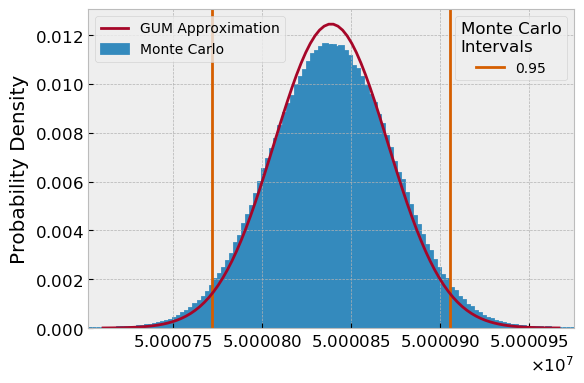

In [6]:
# Compare to GUM-Supplement1 Figure 17
u.out.plot_pdf(intervals=[.95]);